In [1]:
import pandas as pd


In [2]:
dataset = pd.read_csv("PrePlacementdata.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [6]:
 import seaborn as sns

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_20060\2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

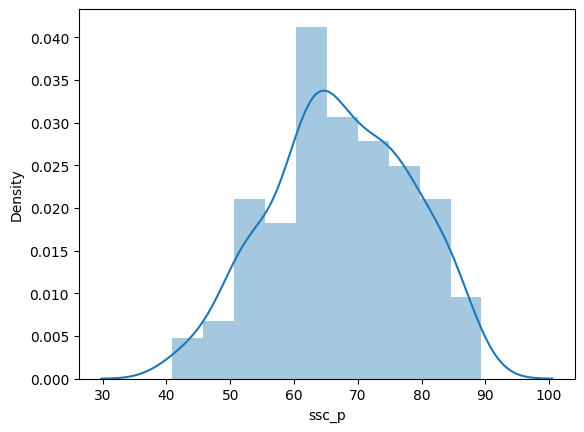

In [8]:
sns.distplot(dataset["ssc_p"])

In [9]:
def get_pdf_probability(dataset,startrange,endrange): # getting parameters for probability density function - dataset[<columnname>],startrange = 60,endrange = 80 
    from matplotlib import pyplot #import pyplot module from matplotlib library for data visualization
    from scipy.stats import norm # import norm method from stats sub module in scipy library for calculating probability density function
    import seaborn as sns # import the data visulalization library
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green') #distplot - function to show the distribution of data, 
                                                                            #dataset - dataset[<columnname>],
                                                                            #kde - Kernel distribution estimation for creating the continuous curve,
                                                                            # kde_kws={'color':'blue'} = colour of curve.
                                                                            # color='Green' - color of histogram
                                    
    pyplot.axvline(startrange,color='Red') # for drawing the startrange axis vertical line with red colour
    pyplot.axvline(endrange,color='Red') # for drawing the endrange axis vertical line with red colour
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()# calculating the mean and std for the dataset = dataset[<columnname>]
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))#print mean and STD 
    # define the distribution
    dist = norm(sample_mean, sample_std)# calling function norm for  calculating pdf using mean and STD
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)] # Get the values between startrange and endrange in the list 
    probabilities = [dist.pdf(value) for value in values]   # for each value in the list calculate the pdf and get it as the list
    prob=sum(probabilities)#sum the probabilities gives the total probability of getting the values between startrange and endrange
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities))) #print the probability
    return prob

Mean=67.303, Standard Deviation=10.827
The area between range(50,90):0.9298623989198703


C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_20060\132380739.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


np.float64(0.9298623989198703)

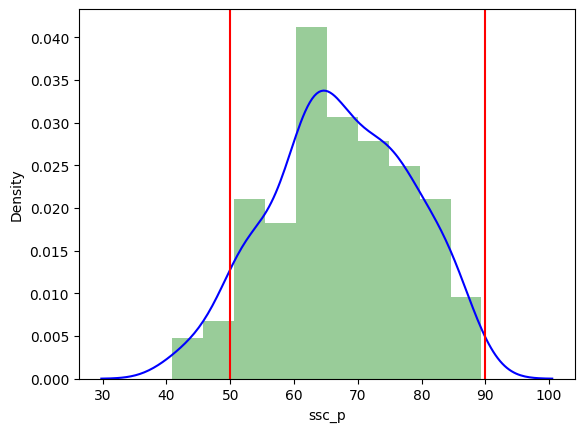

In [25]:
get_pdf_probability(dataset["ssc_p"],50,90)

In [34]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(80)

np.float64(0.8651162790697674)

In [27]:
#!pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 12.3 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.5 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 17.5 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   --------

In [35]:
def stdNBgraph(dataset): # Standard Normal distribution function with argument dataset[<columnname>]
        # Coverted to standard Normal Distribution
    import seaborn as sns  #import the data visulalization library
    mean=dataset.mean()#calculating mean and STD for the input
    std=dataset.std()

    values=[i for i in dataset]#get the each values in the dataset as the list

    z_score=[((j-mean)/std) for j in values] #calculate the zscore for each value and get it as the list

    sns.distplot(z_score,kde=True)#Plot the zscore value with the Kernel distribution estimation as True for creating the continuous curve 

    sum(z_score)/len(z_score)# find mean for the zscore value
    #z_score.std()

C:\Users\SAIRAM\AppData\Local\Temp\ipykernel_20060\4109782476.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


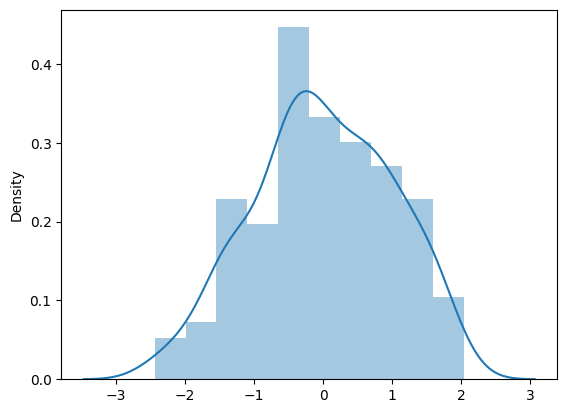

In [36]:
stdNBgraph(dataset["ssc_p"])